# Hw 10/13

## ex1 : Def fun(z) and dfun(z)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Ex3_fun as fun
# %matplotlib widget
np.random.seed(1)

In [2]:
z = np.linspace(1, 5, 5)

In [3]:
print("f is sigmoid : ")

for i in z:
    tmp = fun.sigm(i)
    print(f"f({i}) = {tmp}")
print("\n")
for i in z:
    tmp = fun.sigm_deriv(i)
    print(f"df({i}) = {tmp}")

f is sigmoid : 
f(1.0) = 0.7310585786300049
f(2.0) = 0.8807970779778823
f(3.0) = 0.9525741268224334
f(4.0) = 0.9820137900379085
f(5.0) = 0.9933071490757153


df(1.0) = 0.19661193324148185
df(2.0) = 0.10499358540350662
df(3.0) = 0.045176659730912
df(4.0) = 0.017662706213291107
df(5.0) = 0.006648056670790033


In [4]:
print("f is tanh : ")

for i in z:
    tmp = fun.tanh(i)
    print(f"f({i}) = {tmp}")
print("\n")
for i in z:
    tmp = fun.tanh_deriv(i)
    print(f"df({i}) = {tmp}")

f is tanh : 
f(1.0) = 0.7615941559557649
f(2.0) = 0.9640275800758169
f(3.0) = 0.9950547536867305
f(4.0) = 0.999329299739067
f(5.0) = 0.9999092042625951


df(1.0) = -1.42551882081476
df(2.0) = -3.7743992040419174
df(3.0) = 0.979680483057573
df(4.0) = -0.3405501218616205
df(5.0) = -10.427881707458354


In [5]:
print("f is ReLu : ")

for i in z:
    tmp = fun.relu(i)
    print(f"f({i}) = {tmp}")
print("\n")
for i in z:
    tmp = fun.relu_deriv(i)
    print(f"df({i}) = {tmp}")

f is ReLu : 
f(1.0) = 1.0
f(2.0) = 2.0
f(3.0) = 3.0
f(4.0) = 4.0
f(5.0) = 5.0


df(1.0) = 1
df(2.0) = 1
df(3.0) = 1
df(4.0) = 1
df(5.0) = 1


## ex2 : A Tiny Toy Network

### Step 0 :

In [6]:
x = np.array([[0, 0, 1], 
             [1, 1, 1], 
             [1, 0, 1], 
             [0, 1, 1]])

y = np.array([[0, 1, 1, 0]]).T

### Step 1 & 2  : 

In [7]:
w = (2*np.random.random((3, 1)) - 1)*0.25
b = (2*np.random.random((1)) - 1)*0.25

In [8]:
# Use sigmoid : 
x1_sigm = fun.sigm(np.dot(x, w))

# Use tanh : 
x1_tanh = fun.tanh(np.dot(x, w))

# Use ReLu : 
x1_relu = fun.relu(np.dot(x, w))

In [9]:
# calculate the error : 

err_sigm = np.sqrt(np.dot((y - x1_sigm).T, y - x1_sigm))

err_tanh = np.sqrt(np.dot((y - x1_tanh).T, y - x1_tanh))

err_relu = np.sqrt(np.dot((y - x1_relu).T, y - x1_relu))

print("error, using sigm : ", err_sigm.squeeze())
print("error, using tanh : ", err_tanh.squeeze())
print("error, using relu : ", err_relu.squeeze())

error, using sigm :  1.016291014793053
error, using tanh :  1.7655783392071338
error, using relu :  1.77347227730157


### Step 3 : Each epoch

In [10]:
epochs = 5000
eta = 0.01
x0 = x

In [11]:
error_set = []
for k in range(epochs):
    X1 = fun.sigm(np.dot(x, w) + b)
    X1_err = X1 - y
    X1_delta = X1_err * fun.sigm_deriv(X1)
    
    w = w - eta * np.dot(x0.T, X1_delta)
    c = np.ones(len(X1_delta))
    b = b - eta * np.dot(c, X1_delta)
    
    error = np.sqrt(np.dot((y - X1).T, y - X1)).squeeze()
    error_set.append(error)

In [12]:
X1 = fun.sigm(np.dot(x, w) + b)
error2 = np.sqrt(np.dot((y - X1).T, y - X1))
print("After training, Error = ", error2.squeeze())

After training, Error =  0.198681720888498


In [13]:
print("weight : \n", w)
print("\n")
print("bias : ", b)

weight : 
 [[ 4.42548262]
 [-0.19379309]
 [-1.12555267]]


bias :  [-0.97444357]


In [14]:
pre_x = np.array([[0, 0, 1]])
pre_result = np.dot(pre_x, w) + b


print("Result : ", fun.sigm(pre_result).squeeze())
print("y0 : ", 0)

Result :  0.10909718718064933
y0 :  0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
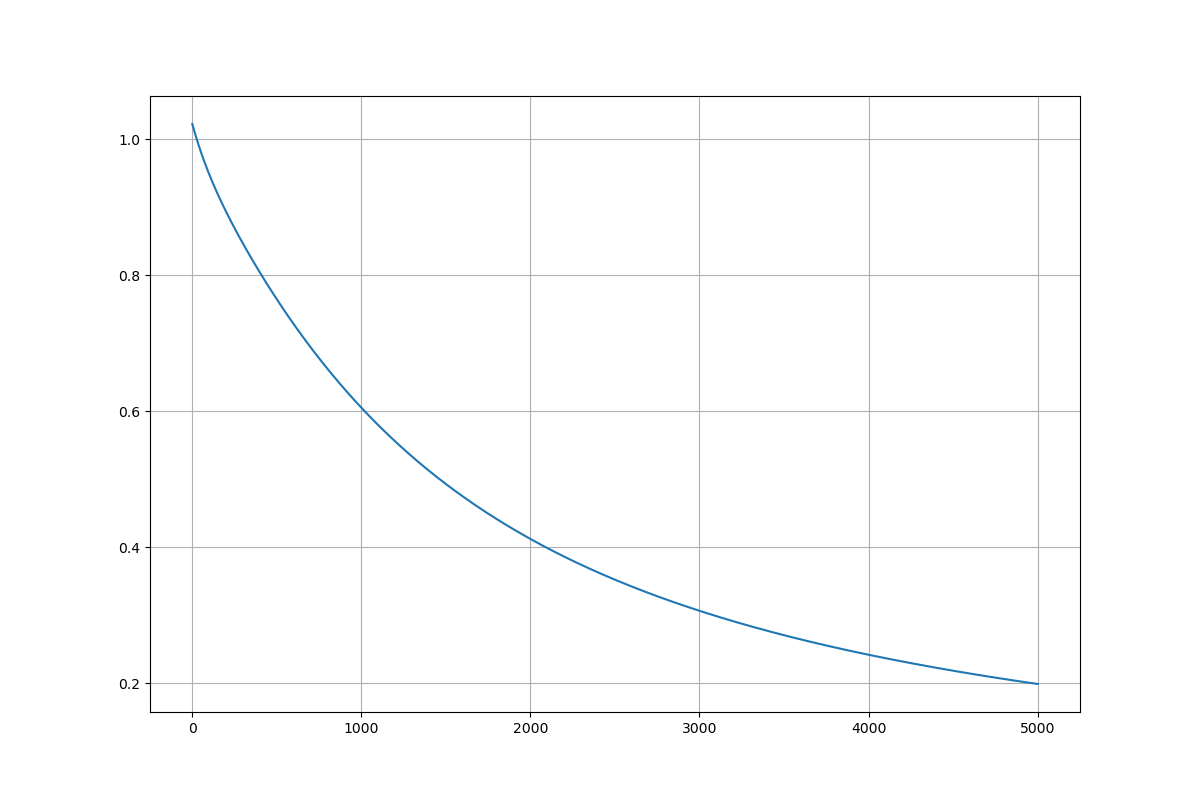

In [15]:
epochs = np.arange(1, epochs + 1)
plt.figure(figsize=(12, 8))
plt.plot(epochs, error_set)
plt.grid()
plt.show()

In [16]:
X = np.array([[1, 1, 1]])
pre_result = np.dot(X, w) + b
y_hat = fun.sigm(pre_result).squeeze()
print("y hat : ", y_hat)
error = np.abs(1 - y_hat)
print("error : ", error)

y hat :  0.893945651099504
error :  0.10605434890049603
